
# DA320 Assignment 4: Jupyter Charts
Jon Kaimmer  
DA320  
Winter2022


 ### Introduction
I set out to explore whether 9/11 had an impact in the movies that are being made and released. Especially in the rate of release of superhero type movies. 


In [665]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import pyodbc

#This allow me to import my adjacent helpers.ipynb module
#Citation: "https://github.com/ipython/ipynb" {<--There are 4 contributors to this page}

#
#
#import ipynb.fs.full.helpers

import ipynb.fs
from .full.helpers import *

#This allow me to import my adjacent helpers.ipynb module
#
#
#Credentials used to store passwords
credentialLocation = "C:\\Users\\jonat\\OneDrive\\Documents\\GitHub\\DA320\\credentials.json"

# Establish pyodbc bridge to sql servefr
connection = connectToSQLServer(credentialLocation)

# Create cursor object
cursor = connection.cursor()

sns.set(rc = {'figure.figsize':(40,8)})

# Superhero movies

In [666]:
#Pull in Superhero movie data
sql="""SELECT * FROM rawmoviedata"""
superhero_df = pd.read_sql_query(sql, connection)
#superhero_df.head()

C:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


How many superhero movies are being released per year? Does that trend seem to be increasing?

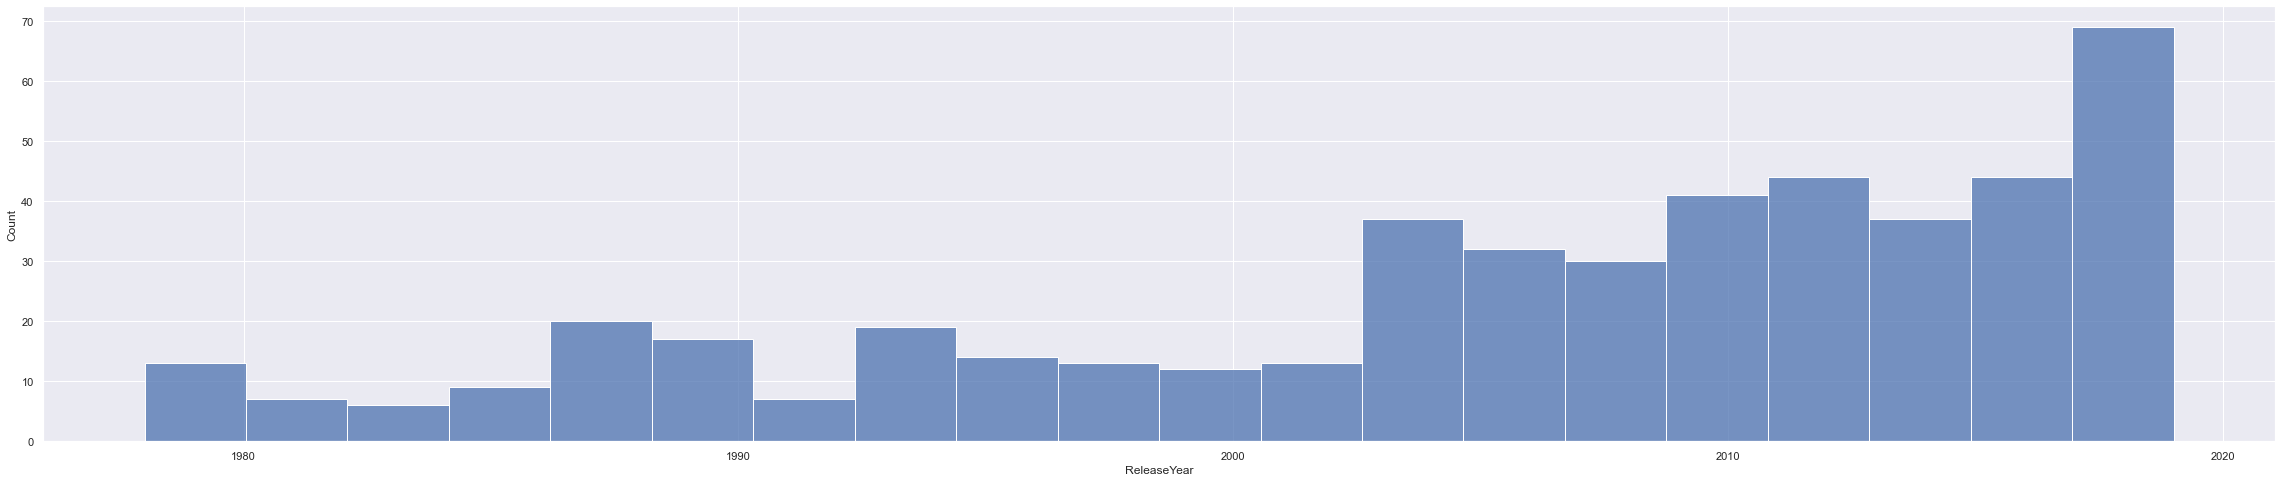

In [668]:
sns.histplot(
    data=superhero_df, #Designate the pandas dataframe "superhero_df" is the data for this histogram
    x='ReleaseYear', #superhero_df['ReleaseYear'] should be the x axis. 
    bins=20
    )
plt.show()

It does seem that there are more supehero movies being released in the last 20 years than in the 20 years prior, and it seems that the trend is generally increasing. 
...But maybe all movies have increased since then, so the increase in superhero movies has been caught up in that general upward trend. 

Lets see both superhero movie released AND total movie releases on the same graph to compare the two sets of data.  

C:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


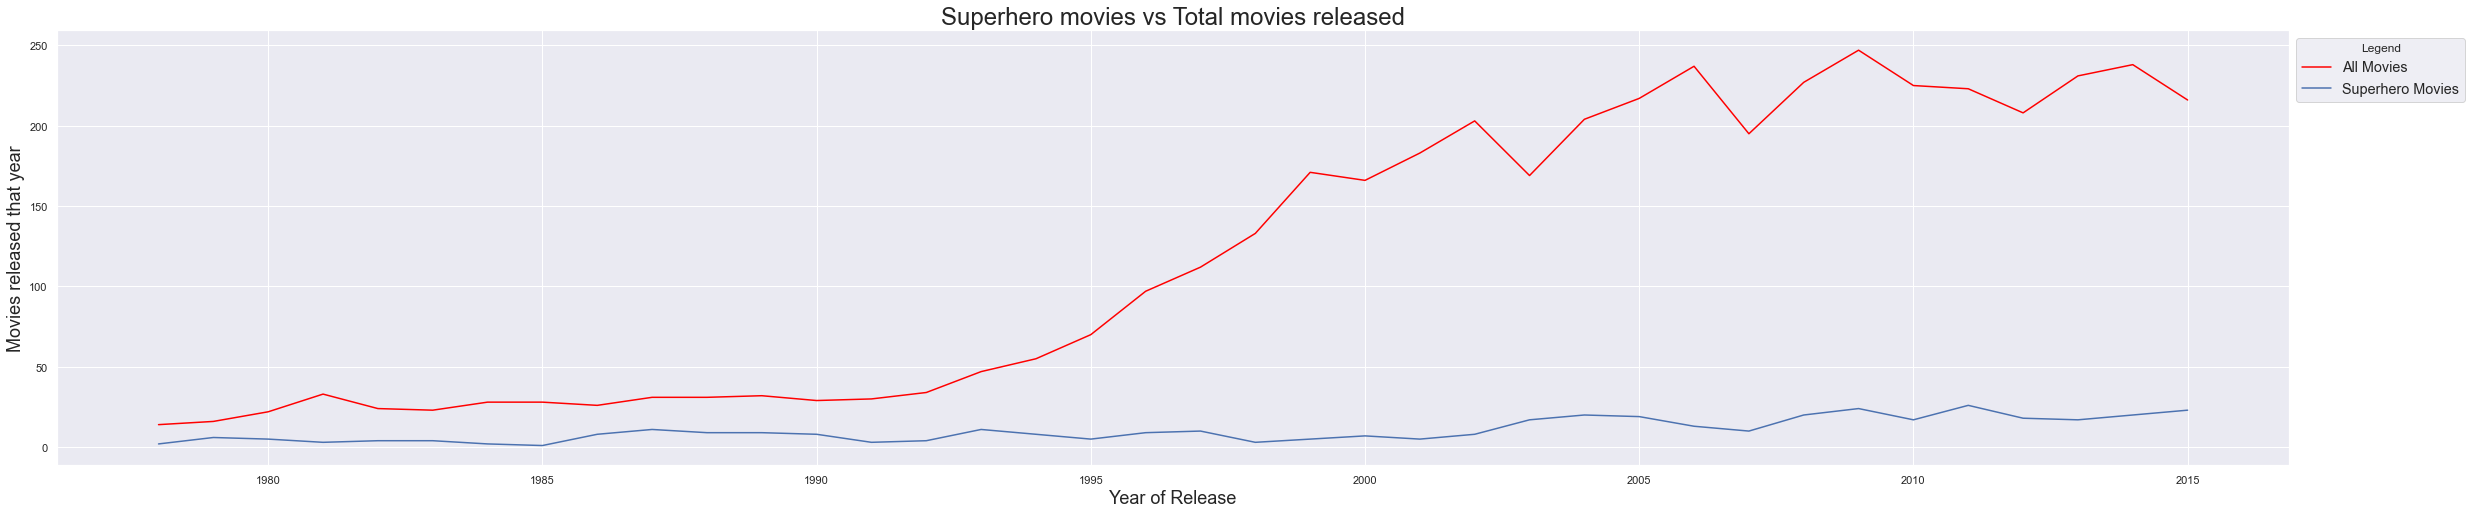

In [669]:
#Total number of movies being release per year
sql="""
SELECT 
    YEAR(Release_Date) AS ReleaseYear,
    COUNT(Release_Date) AS SumOfYear
FROM tmdb_5000_movies
WHERE YEAR(Release_Date) > 1977 AND YEAR(Release_Date) < 2016
GROUP BY 
    YEAR(Release_Date)
ORDER BY
    YEAR(Release_Date)
"""
SumAllmovie_df = pd.read_sql_query(sql, connection)
#Total number of movies being release per year

#Total Superhero movies being released per year
sql="""
SELECT 
    ReleaseYear,
    COUNT(ReleaseYear) AS SumOfYear
FROM rawmoviedata
WHERE ReleaseYear < 2016
GROUP BY 
    ReleaseYear
"""
SumAllSuperhero_df = pd.read_sql_query(sql, connection)
#Total Superhero movies being released per year

plot = sns.lineplot(
    data=SumAllmovie_df,
    x='ReleaseYear',
    y='SumOfYear',
    color='Red'
)
sns.lineplot(
    data=SumAllSuperhero_df,
    x='ReleaseYear',
    y='SumOfYear'
)
plt.title('Superhero movies vs Total movies released', size= 24)
plt.xlabel('Year of Release', size= 18)
plt.ylabel('Movies released that year',size= 18)
plt.legend(labels=['All Movies', 'Superhero Movies'], fontsize = 'large', title='Legend', title_fontsize="12",loc = 2, bbox_to_anchor = (1,1))
plt.show()

Oh wow... ok so there has been a steep incline in total movies that have been released starting in the early 1990's. Interesting that the number of superhero movies being released per year did not also experience that same upward trend.
lets see this data in another way. I wonder how the average budget per movie has changed across time? 

C:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


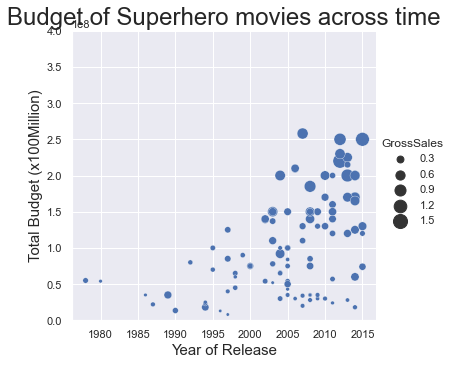

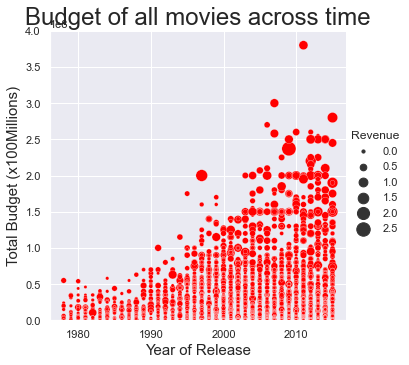

In [670]:
#Find budget of superhero movies
sql="""
SELECT 
    ReleaseYear, Budget, Runtime, Rating, GrossSales
FROM rawmoviedata
WHERE ReleaseYear < 2016 AND GrossSales IS NOT NULL
"""
superheroBudget_df = pd.read_sql_query(sql, connection)
#Total number of movies being release per year

sql="""
SELECT 
    YEAR(Release_Date) AS ReleaseYear,Budget,original_title,Revenue
FROM tmdb_5000_movies
WHERE YEAR(Release_Date) > 1977 AND YEAR(Release_Date) < 2016
"""
allMovieBudget_df = pd.read_sql_query(sql, connection)
#Total number of movies being release per year

sns.relplot(
    data=superheroBudget_df,
    x='ReleaseYear', y='Budget',
    size="GrossSales", sizes=(10,200)
)
plt.title('Budget of Superhero movies across time', size= 24)
plt.xlabel('Year of Release', size= 15)
plt.ylabel('Total Budget (x100Million)',size= 15)
plt.ylim((0,400000000))

sns.relplot(
    data=allMovieBudget_df,
    x='ReleaseYear', y='Budget',
    size="Revenue", sizes=(10,200), color='red'
)
plt.title('Budget of all movies across time', size= 24)
plt.xlabel('Year of Release', size= 15)
plt.ylabel('Total Budget (x100Millions)',size= 15)
plt.ylim((0,400000000))
plt.show()

We see that all movies budgets have increased roughly at the same rate and in the same proportion over time. 

C:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:758: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


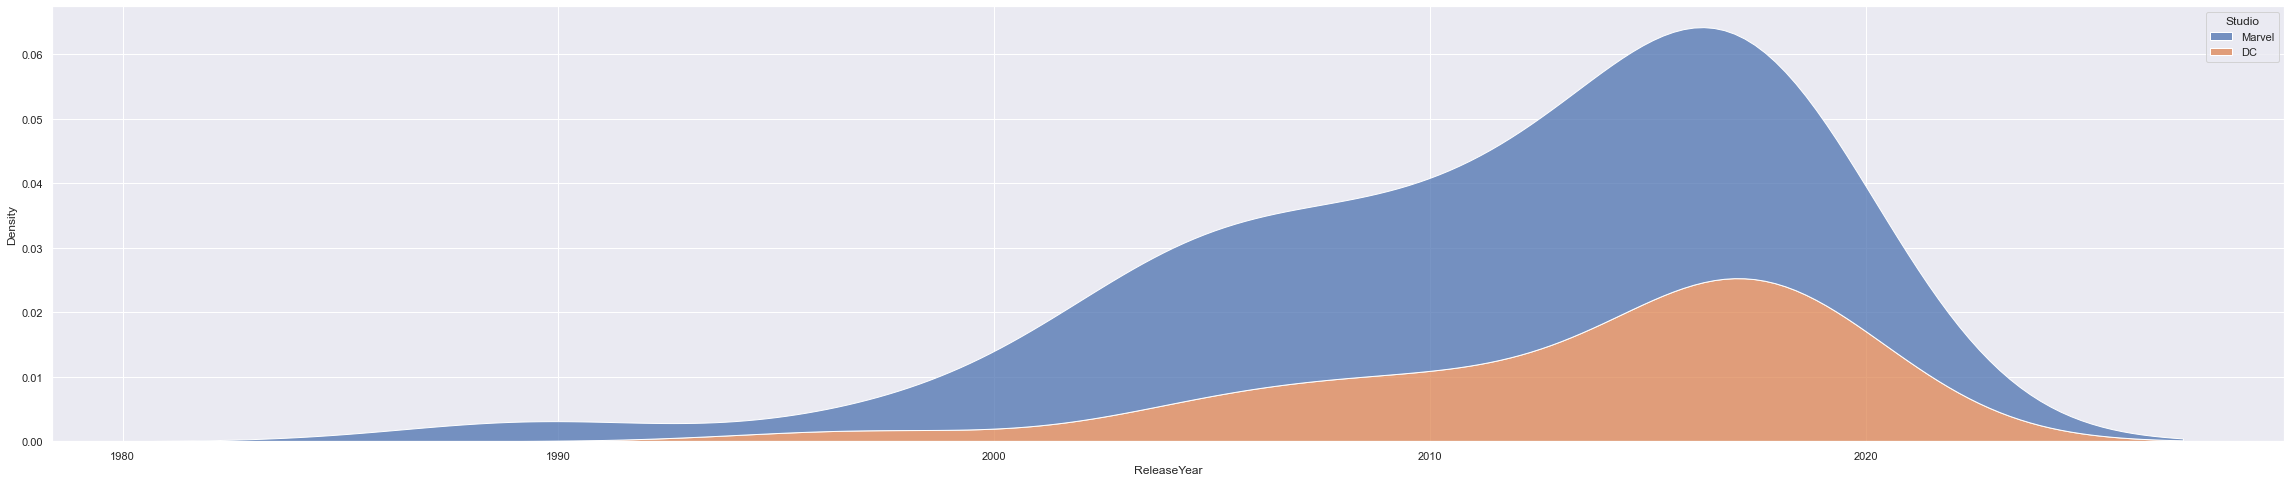

In [671]:
#But who is making these movies? The studios that I know off the top of my head are Marvel and DC(WarnerBros). Lets see their relative contribution to this data?
#
#
# First I need to create a new column where I categorieze movies into 3 buckets {Marvel, DC, Other}. To do this I use a CASE WHEN 
#Look at the Studios making these films

sqlQueryMARVELvDC ="""SELECT Title, ReleaseYear, GrossSales,
CASE 
    WHEN ( 
        Company1 LIKE '%Marvel%' OR 
        Company2 LIKE '%Marvel%' OR
        Company3 LIKE '%Marvel%' OR
        Company4 LIKE '%Marvel%' OR
        Company5 LIKE '%Marvel%') THEN 'Marvel'
    WHEN (
        Company1 LIKE '%DC Comics%' OR Company1 LIKE '%DC Entertainment%' OR 
        Company2 LIKE '%DC Comics%' OR Company2 LIKE '%DC Entertainment%' OR 
        Company3 LIKE '%DC Comics%' OR Company3 LIKE '%DC Entertainment%' OR 
        Company4 LIKE '%DC Comics%' OR Company4 LIKE '%DC Entertainment%' OR 
        Company5 LIKE '%DC Comics%' OR Company5 LIKE '%DC Entertainment%')
        THEN 'DC'
    ELSE NULL
END AS Studio
FROM [dbo].[rawmoviedata];
"""

ALLstudio_df = pd.read_sql_query(sqlQueryMARVELvDC, connection)
#ALLstudio_df.head()
#This only shows MARVEL vs DC
studio_df = pd.read_sql_query(sqlQueryMARVELvDC, connection)
sns.kdeplot(
    data=studio_df,
    x='ReleaseYear',
    hue="Studio",
    multiple="stack"
    )
plt.title('Marvel vs DC Releases', size= 24)
plt.xlabel('Year of Release', size= 18)
plt.ylabel('Movies released by that studio',size= 18)
plt.show()

While both Marvel and DC studios have increased the number sof movies that they both output per year, Marvel pumped out significantly more movies over time starting in the early 2000's

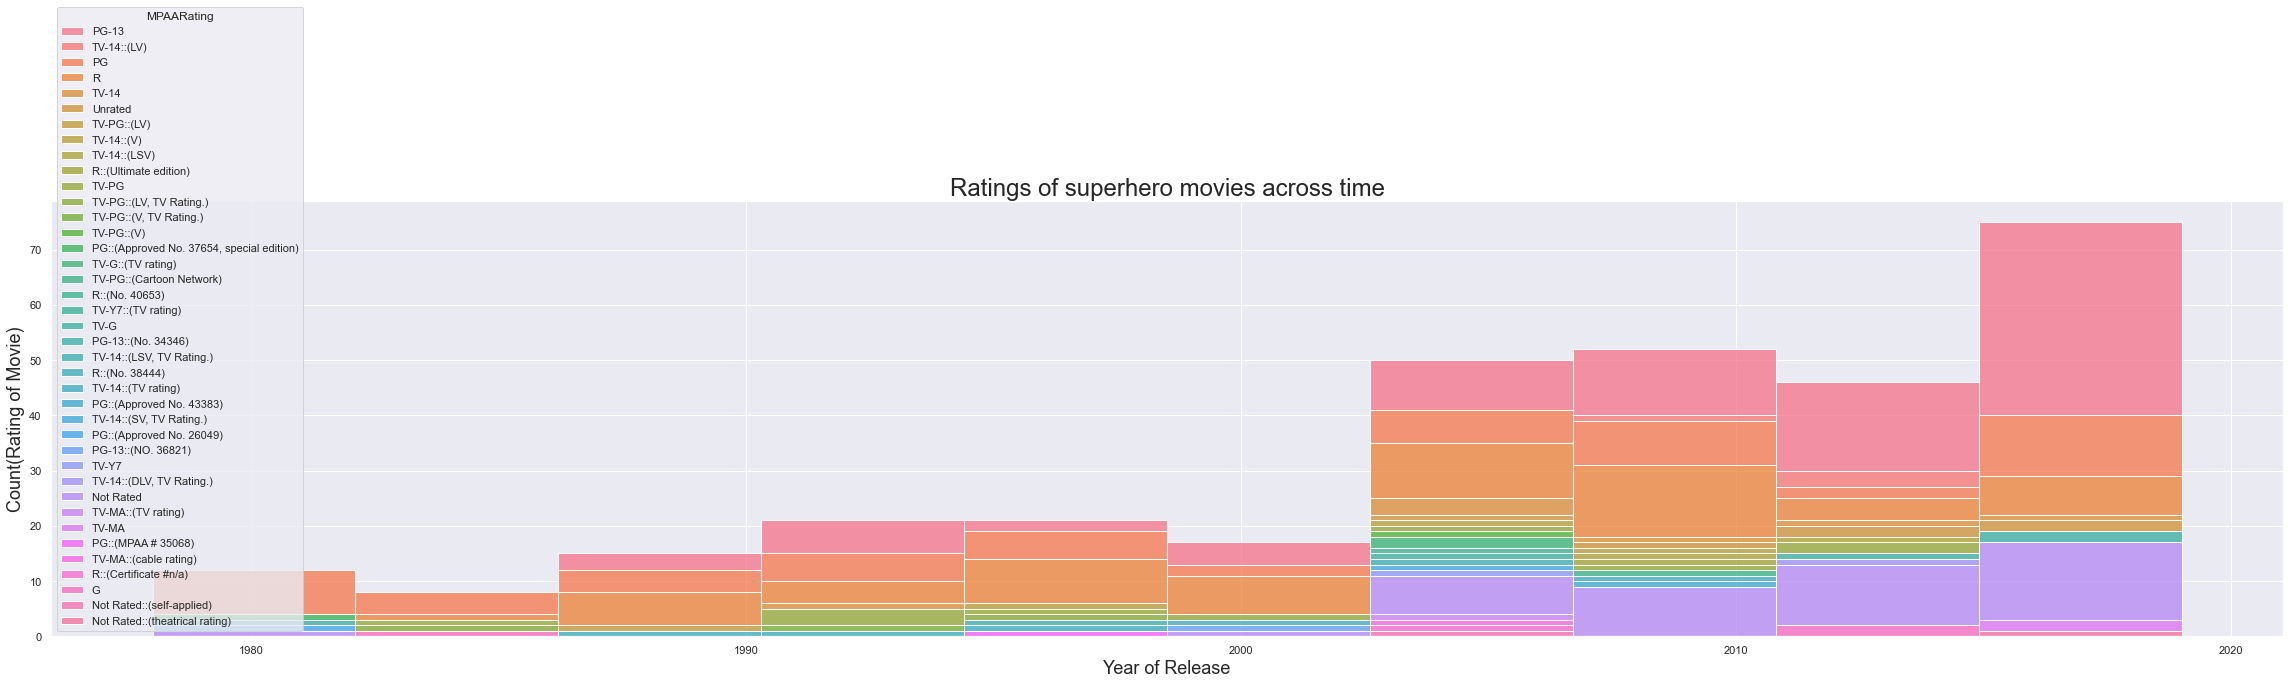

In [674]:
#Change in the ratings of superhero content across time. 
# This chart is unfinished. I wnated it to be sorted into buckets of content (R / TV:MA etc) vs (PG-13 etc) but I was not able to finish this by the assignment date. 

sns.histplot(
    data=superhero_df, #Designate the pandas dataframe "superhero_df" is the data for this histogram
    x='ReleaseYear', #superhero_df['ReleaseYear'] should be the x axis. 
    hue='MPAARating',
    multiple='stack')
plt.title('Ratings of superhero movies across time', size= 24)
plt.xlabel('Year of Release', size= 18)
plt.ylabel('Count(Rating of Movie)',size= 18)
#plt.legend(fontsize = 'large', title='Legend', title_fontsize="12",loc = 2, bbox_to_anchor = (1,1))
plt.show()

 ### Conclusion

 I set out to explore the question "9/11 had a impact into every aspect of American life, is that impact discoverable in the type, rate, budget or content rating of movies being released? Especially in superhero movies."

What did I learn?
I learned that while the total numbers of movies being made has increased over time, the rate of superhero movies being produced has increased at a smaller rate. It is possible that further analysis, breaking the total number of movies being produced down into each of their subgenres could expose a trend here. 

I leaned that the total budget of superhero movies has stayed roughly consistent with the total budgets of all movies. 

I believe further analysis could drill into the MPAA ratings chart above and look at the changes in the proportion of mature content vs PG content across time. 